# Analyse GANN training

## Init

Load libraries

In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#sessionInfo()
#reticulate::py_install(packages = 'umap-learn')

Set paths

In [3]:
paths.train_nonorm_path <- "../data/tpm_combined_train_nonorm.csv"
paths.test_nonorm_path <- "../data/tpm_combined_test_nonorm.csv"
paths.gen_1_path <- "../data/results/gen_prof_4000.csv"

## Load and visualise

Load unnormalised training data

In [4]:
train_nonorm_raw <- read.table(file=paths.train_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(train_nonorm_raw)

,P1.3.A10,P1.3.A11,P1.3.A12,P1.3.A2,P1.3.A4,P1.3.A5,P1.3.A6,P1.3.A7,P1.3.A8,P1.3.B3,⋯,GHA501A85,GHA501A86,GHA501A88,GHA501A89,GHA501A90,GHA501A94,GHA501A95,GHA501A98,GHA501A99,GHA501A9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,0.000000,0.000000,0.000000,3.051372,5.617063,0.000000,0.0000000,3.526069,⋯,7.7553921,1.241720,6.2614044,6.480059,4.7291586,6.4899840,1.092268,3.6619208,3.921598,0.000000
Cd47,6.033863,5.564378,4.365972,6.768714,5.736875,4.075533,6.556276,4.442280,4.7147950,5.123914,⋯,8.8863576,9.001691,8.5115705,7.932110,7.6587774,6.0236338,10.458879,7.5448340,8.581246,9.770376
Elmo2,5.838195,0.000000,5.755422,7.441948,5.530757,6.876149,6.384568,7.330200,6.6519127,5.215679,⋯,6.7044797,5.044924,5.3982323,2.299830,0.7719891,1.2724215,2.308829,2.1354247,6.343773,3.824600
Crip2,3.327687,7.560868,0.000000,6.962318,5.048759,5.891905,0.000000,0.000000,4.4289463,4.556429,⋯,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000
Pprc1,5.766860,0.000000,5.279471,4.466627,4.186659,2.851999,2.272023,5.751410,0.8318772,5.511595,⋯,3.8067596,0.000000,1.0618995,4.385497,1.6626486,0.0000000,0.000000,0.7437538,2.725903,1.069900
Ccdc174,1.372952,0.000000,0.000000,5.659925,2.981853,0.000000,0.000000,1.879706,0.0000000,1.589763,⋯,0.3346734,4.237288,0.5734587,5.510105,2.3899220,0.9136959,5.156094,2.6889399,1.939234,6.256904


Load unnormalised test data

In [5]:
test_nonorm_raw <- read.table(file=paths.test_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(test_nonorm_raw)

,P1.3.A3,P1.3.B10,P1.3.B12,P1.3.B2,P1.3.B8,P1.3.D1,P1.3.D12,P1.3.D9,P1.3.E1,P1.3.E4,⋯,GHA501A41,GHA501A47,GHA501A48,GHA501A54,GHA501A69,GHA501A70,GHA501A72,GHA501A74,GHA501A83,GHA501A93
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,4.703765,0.000000,0.000000,5.227279,4.800641,0.0000000,0.0000000,0.000000,⋯,0.5448804,0.7823517,0.6369969,2.175254,0.000000,1.7801001,3.801378,0.7655439,0.000000,3.4088070
Cd47,0.000000,3.196922,5.099716,2.918386,5.226123,0.000000,3.658783,3.0373822,0.0000000,7.142720,⋯,2.7807633,8.4777158,9.2550843,8.408633,6.871060,9.2950091,4.947373,8.5891534,9.918273,9.7571295
Elmo2,8.091382,5.988912,6.964745,4.581351,6.436295,4.409391,4.185867,4.3490821,0.3561438,7.410918,⋯,5.6864396,0.7812074,0.0000000,2.647312,0.000000,0.5416181,0.000000,3.9701527,2.691955,1.6911530
Crip2,7.533408,0.000000,3.824768,0.000000,0.000000,0.000000,0.000000,5.8872816,3.7516779,0.000000,⋯,8.1795533,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.9078236,0.000000,0.0000000
Pprc1,0.000000,2.914565,4.851999,5.107269,3.198494,4.257765,5.157044,0.0000000,0.4114262,3.766595,⋯,0.3990446,2.5846768,0.0000000,3.723433,4.377274,0.2765536,3.884531,0.3138547,0.000000,0.5628152
Ccdc174,0.000000,2.704872,2.817623,3.266037,4.399855,4.531693,3.204767,0.6322682,1.7355222,0.000000,⋯,1.4413852,1.7464567,1.0269647,4.373164,4.417183,5.3613503,0.000000,0.0000000,5.389610,1.6996514


Load gen prof-1

In [6]:
genprof_1_raw <- read.table(file=paths.gen_1_path, sep=",", row.names = 1, header=TRUE)
head(genprof_1_raw)

,gencell_ep3200_0,gencell_ep3200_1,gencell_ep3200_2,gencell_ep3200_3,gencell_ep3200_4,gencell_ep3200_5,gencell_ep3200_6,gencell_ep3200_7,gencell_ep3200_8,gencell_ep3200_9,⋯,gencell_ep3200_490,gencell_ep3200_491,gencell_ep3200_492,gencell_ep3200_493,gencell_ep3200_494,gencell_ep3200_495,gencell_ep3200_496,gencell_ep3200_497,gencell_ep3200_498,gencell_ep3200_499
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,14.299669,14.145267,14.252393,12.389840,14.364954,5.700356,14.256887,14.249055,14.288480,14.220484,⋯,14.272904,14.135886,14.256945,14.151338,14.185375,14.251839,14.244022,14.125526,14.260481,14.224190
Cd47,8.601994,8.608774,8.598162,8.790522,8.596992,11.760003,8.601838,8.603013,8.597261,8.602981,⋯,8.593097,8.608443,8.597786,8.607044,8.604790,8.602665,8.599490,8.611765,8.599701,8.598343
Elmo2,14.299907,14.163825,14.260246,12.386023,14.352986,5.704480,14.246145,14.238379,14.277578,14.217555,⋯,14.273321,14.143245,14.254842,14.155401,14.192011,14.252441,14.235050,14.122173,14.269231,14.221022
Crip2,8.601635,8.607516,8.596188,8.791480,8.597529,11.745959,8.600446,8.603836,8.596800,8.603733,⋯,8.594165,8.609536,8.598144,8.606139,8.604507,8.601081,8.600543,8.611434,8.599218,8.598346
Pprc1,14.302482,14.172942,14.280554,12.381788,14.378679,5.685446,14.259574,14.268370,14.300238,14.241109,⋯,14.291176,14.142753,14.281171,14.173925,14.206661,14.269410,14.258362,14.147696,14.268071,14.245903
Ccdc174,14.304398,14.188809,14.279460,12.325243,14.361706,5.694838,14.248982,14.283291,14.308536,14.248550,⋯,14.278121,14.163172,14.273027,14.187608,14.199878,14.255838,14.257237,14.079323,14.299088,14.239227


Create Seurat objects

In [7]:
train_nonorm <- CreateSeuratObject(counts = train_nonorm_raw, project="wgan_train")
train_nonorm

An object of class Seurat 
6807 features across 1798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [8]:
test_nonorm <- CreateSeuratObject(counts = test_nonorm_raw, project="wgan_test")
test_nonorm

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [9]:
gen_prof_1 <- CreateSeuratObject(counts = genprof_1_raw, project="gen_prof_1")
gen_prof_1

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

Merge together

In [10]:
data_combined <- merge(train_nonorm, y = list(test_nonorm, gen_prof_1), add.cell.ids = c("Train", "Test", "Gen1"), project = "wgan")
data_combined

An object of class Seurat 
6807 features across 2798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [11]:
table(data_combined$orig.ident)


   gencell  wgan_test wgan_train 
       500        500       1798 

## Perform QC

In [12]:
# Look at some canonical marker genes and metrics
#VlnPlot(train_nonorm,c("ENSMUSG00000000001","ENSMUSG00000000056","ENSMUSG00000000058","ENSMUSG00000000078"))

## Normalise and scale data

In [13]:
data_combined <- NormalizeData(data_combined)

In [14]:
data_combined <- FindVariableFeatures(data_combined, selection.method = "vst", nfeatures = 2000)

In [15]:
all.genes <- rownames(data_combined)
data_combined <- ScaleData(object = data_combined, features = all.genes)

Centering and scaling data matrix



## Dim reduction

In [16]:
data_combined <- RunPCA(object = data_combined, features = VariableFeatures(object = data_combined))

PC_ 1 
Positive:  Perp, Rplp1, Dmkn, Rps29, Sbsn, B2m, Rps3a1, Anxa8, Fau, Klf4 
	   Hspb1, Lgals7, Sdc4, Krt10, Fam25c, Krtdap, Anxa2, Krt15, Tmsb4x, Ly6d 
	   Fos, Calm4, Rps24, S100a11, Sfn, Dapl1, Rps12, Rpl19, Anxa1, Tacstd2 
Negative:  Zfp488, Eno1, Tonsl, Ruvbl2, Dvl3, Hnrnpa1, Fn1, Fads1, Rbm15, Slc38a6 
	   Krit1, Pxdn, Pfas, Lamb1, Ipo7, Galk1, Pdlim7, Tfdp1, Fscn1, Spc24 
	   Raver1, Chek2, Elk4, Zbtb38, R3hdm1, Pdpn, Kansl2, Nme4, Foxo3, Pds5a 
PC_ 2 
Positive:  Nupr1, Klk8, Ptges, Dhrs7, Ly6a, 2200002D01Rik, Acer1, Ptgs1, Crabp2, Cldn4 
	   Sprr1a, Bnip3, Rbm48, Acsbg1, Gdpd1, Fosl1, Orm1, Car13, Clu, Ypel5 
	   Pgm2, Agpat4, Slc9a3r1, Tapbpl, Ptgr1, Ccdc84, Dynlt1a, Ormdl2, Krt16, Psmb8 
Negative:  Atp6v0c, Itgb4, Raly, Dmd, Ltbp4, Plch2, Fgfr2, Cdh3, Usp50, Hspg2 
	   Apoe, Bnc2, Dennd1a, Celf1, Vangl2, Mob1a, Leng8, Jag2, Gtf2ird1, Hnrnpa1 
	   Prrc2b, Tomm6, Col18a1, Tcf4, Slc38a10, Rnf44, Sipa1l3, Foxo3, Ucp2, Plxnb1 
PC_ 3 
Positive:  Dgat2, Bpifc, Ly6g6e, Ivl, Sdr16

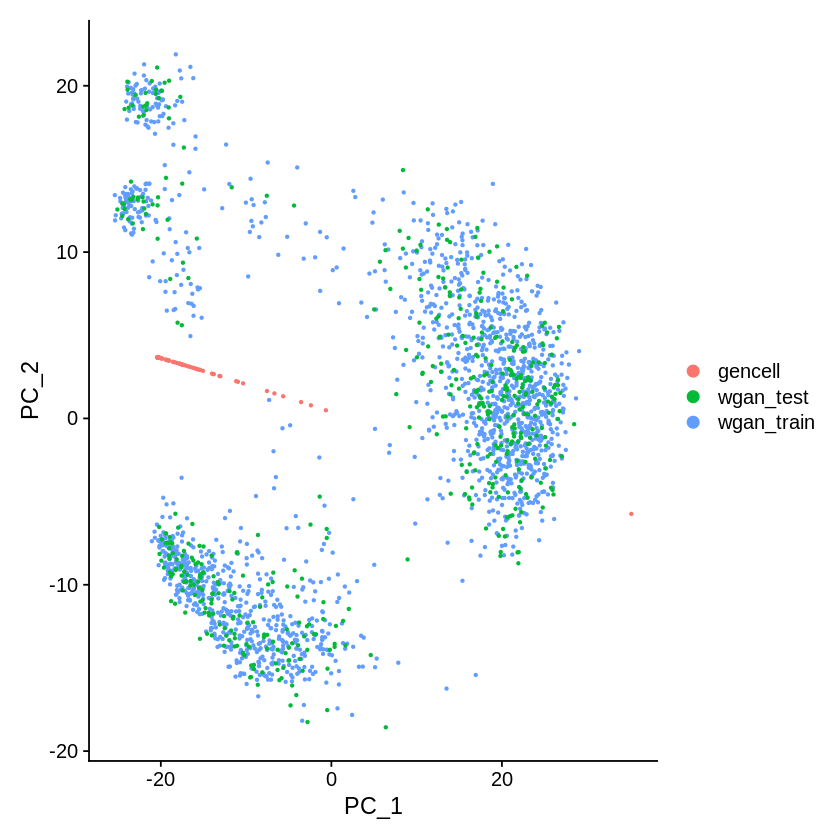

In [17]:
DimPlot(data_combined, reduction = "pca")

In [18]:
data_combined <- RunTSNE(object = data_combined, dims = 3:10)

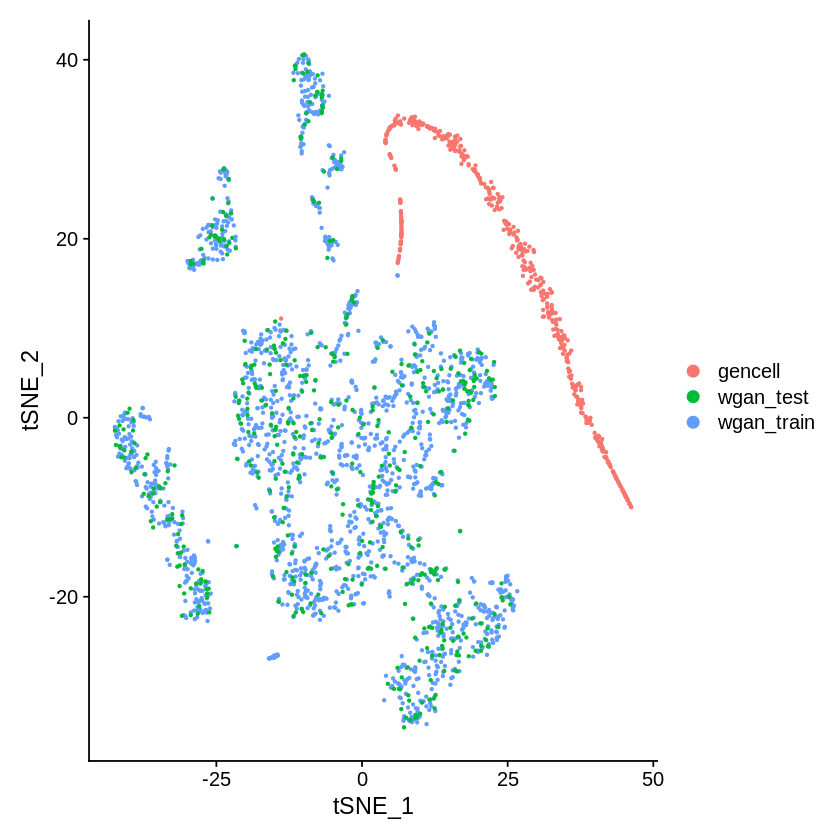

In [19]:
DimPlot(data_combined, reduction = "tsne")